In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# Configuración inicial: Importa librerías clave para análisis (Pandas, NumPy) y visualización (Seaborn, Matplotlib), suprime advertencias y define el estilo gráfico.

### Diccionario de variables

| Campo      | Descripción |
|------------|-------------|
| **ID** | Un identificador único para cada registro en el conjunto de datos. |
| **No_Pation** | Otro identificador del paciente. Podría ser un número de paciente o un ID de registro. |
| **Gender** | El género del paciente (F para Femenino, M para Masculino). |
| **AGE** | La edad del paciente en años. |
| **Urea** | Nivel de urea en la sangre (en mg/dL o mmol/L).<br>Indica la función renal. |
| **Cr** | Nivel de creatinina en la sangre (en mg/dL o µmol/L).<br>También indica la función renal. |
| **HbA1c** | Hemoglobina glucosilada.<br>Mide el nivel promedio de azúcar en sangre durante los últimos 2-3 meses (%). |
| **Chol** | Nivel de colesterol total en la sangre (en mg/dL o mmol/L). |
| **TG** | Nivel de triglicéridos en la sangre (en mg/dL o mmol/L). |
| **HDL** | Colesterol de lipoproteínas de alta densidad ("colesterol bueno"). |
| **LDL** | Colesterol de lipoproteínas de baja densidad ("colesterol malo"). |
| **VLDL** | Colesterol de lipoproteínas de muy baja densidad. |
| **BMI** | Índice de Masa Corporal (peso en kg / altura en m²). Mide la grasa corporal. |
| **CLASS** | Etiqueta de clase que indica el estado diabético del paciente:<br>- **N**: No diabético<br>- **P**: Prediabético<br>- **Y**: Diabético |


In [ ]:
df = pd.read_csv('./datasets/dataset_diabetes.csv')
df.columns = [i.lower() for i in df.columns]
# Carga del dataset desde un archivo CSV y estandariza los nombres de las columnas a minúsculas para facilitar su manipulación.

#### Data Pre-processing

In [ ]:
df['class'] = df['class'].apply(lambda x: x.strip())
df['gender'] = df['gender'].apply(lambda x: x.upper())
df['class'] = df['class'].apply(lambda x: x.replace('Y','diabetico').replace('N','no_diabetico').replace('P','prediabetico'))
# Limpieza y transformación de columnas de texto: Se estandariza el formato en 'gender' y 'class', y se recodifica la variable objetivo con etiquetas más descriptivas.

#### Chequear valores duplicados

In [ ]:
df[df.duplicated()]
# Identifica y muestra todas las filas duplicadas presentes en el DataFrame.

,id,no_pation,gender,age,urea,cr,hba1c,chol,tg,hdl,ldl,vldl,bmi,class


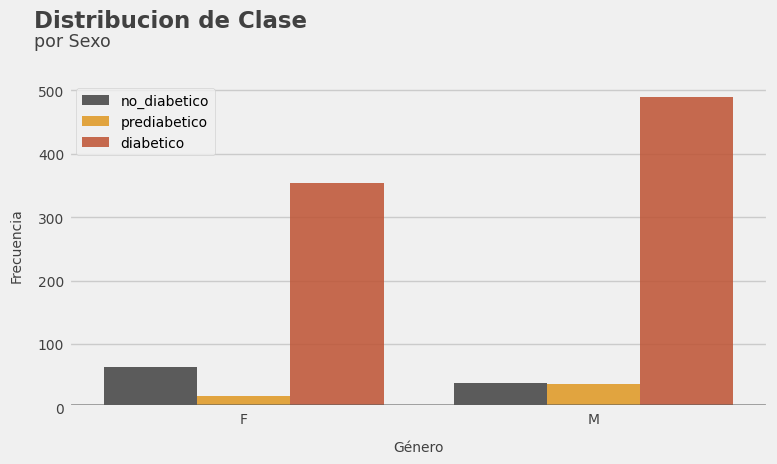

In [ ]:
palette = {
    'no_diabetico': '#414141', 
    'prediabetico': '#FF9F00', 
    'diabetico': '#D5451B'   
}

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='gender',  hue='class', palette=palette, alpha = 0.85)


plt.ylabel('Frecuencia', fontsize = 10, color = '#414141',labelpad = 10)
plt.xlabel('Género', fontsize = 10, color = '#414141',labelpad = 10)

plt.yticks( fontsize = 10, color = '#414141');
plt.xticks( fontsize = 10, color = '#414141');
plt.axhline(y = 0, color = '#414141', linewidth = 5, alpha = 0.5)


plt.text(x=-0.6, y=600, s = "Distribucion de Clase", fontsize = 16.5, fontweight = 'bold', color = '#414141');
plt.text(x=-0.6, y=570, s = 'por Sexo', fontsize = 12.5, color = '#414141');
plt.legend(loc = 'upper left',fancybox = True, fontsize = 10,)

plt.tight_layout()
plt.show()

# Crea y personaliza un gráfico de barras (countplot) para comparar la frecuencia de cada clase de diabetes entre géneros, aplicando un estilo y anotaciones específicas.

- El gráfico muestra la distribución de las clases diabéticas (no diabético, prediabético y diabético) según el género de los pacientes. 
- Se observa que tanto en mujeres (F) como en hombres (M), la clase diabética es la más frecuente, con una mayor concentración en los hombres. Esto sugiere una mayor prevalencia de diabetes en hombres dentro del conjunto de datos analizado. En contraste, las clases no diabética y prediabética presentan frecuencias mucho menores, siendo ligeramente más comunes en mujeres que en hombres.

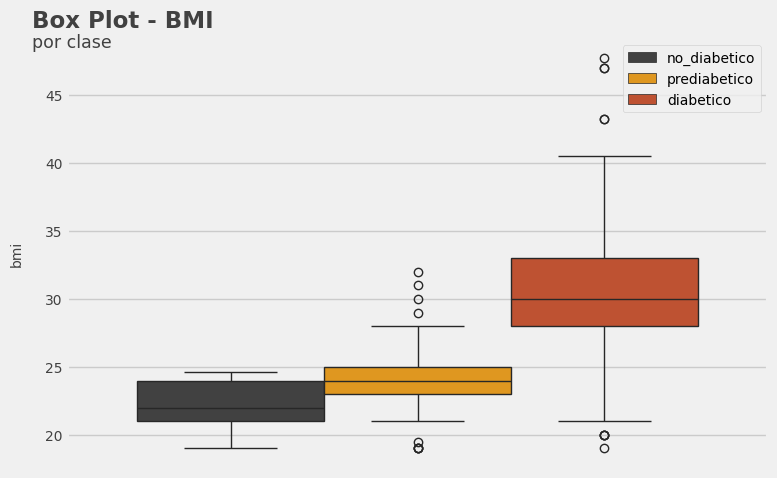

In [ ]:
columna = 'bmi'
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, y=columna,  hue='class', palette=palette)

plt.ylabel(f'{columna}', fontsize = 10, color = '#414141',labelpad = 15)

plt.yticks( fontsize = 10, color = '#414141');
plt.xticks( fontsize = 10, color = '#414141');
# plt.axhline(y = 0, color = '#414141', linewidth = 5, alpha = 0.5)


plt.text(x=-0.55, y=50, s = "Box Plot - BMI", fontsize = 16.5, fontweight = 'bold', color = '#414141');
plt.text(x=-0.55, y=48.5, s = 'por clase', fontsize = 12.5, color = '#414141');
plt.legend(loc = 'upper right',fancybox = True, fontsize = 10,)

plt.tight_layout()
plt.show()
# Crea un diagrama de caja (box plot) para visualizar y comparar la distribución de una variable numérica ('bmi') a través de las categorías de 'class'.

### Interpretacion: 
El gráfico muestra que el índice de masa corporal (BMI) es más alto en diabéticos, seguido por prediabéticos y más bajo en no diabéticos, con mayor dispersión y valores extremos en el grupo diabético.

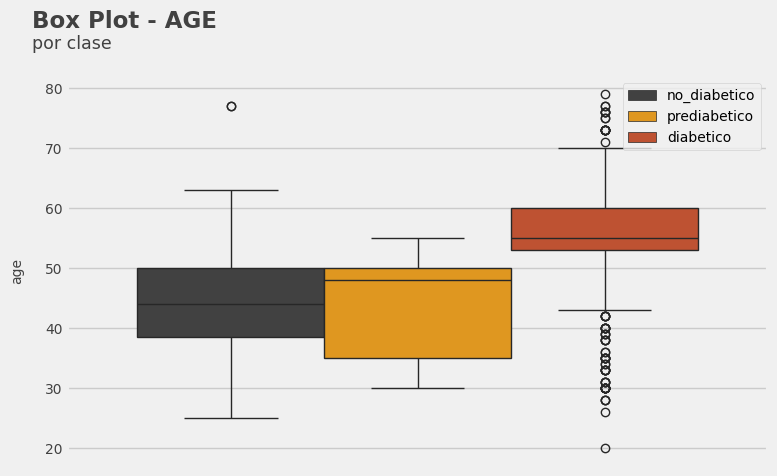

In [ ]:
columna = 'age'
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, y=columna,  hue='class', palette=palette)

plt.ylabel(f'{columna}', fontsize = 10, color = '#414141',labelpad = 15)

plt.yticks( fontsize = 10, color = '#414141');
plt.xticks( fontsize = 10, color = '#414141');
# plt.axhline(y = 0, color = '#414141', linewidth = 5, alpha = 0.5)


plt.text(x=-0.55, y=90, s = f"Box Plot - {columna.upper()}", fontsize = 16.5, fontweight = 'bold', color = '#414141');
plt.text(x=-0.55, y=86.5, s = 'por clase', fontsize = 12.5, color = '#414141');
plt.legend(loc = 'upper right',fancybox = True, fontsize = 10,)

plt.tight_layout()
plt.show()
# Crea un diagrama de caja (box plot) para visualizar y comparar la distribución de una variable numérica ('age') a través de las categorías de 'class'.


#### Interpretación:
El gráfico muestra que la edad es más alta en diabéticos, seguida por prediabéticos y más baja en no diabéticos, con mayor dispersión y valores extremos en los grupos no diabético y diabético.

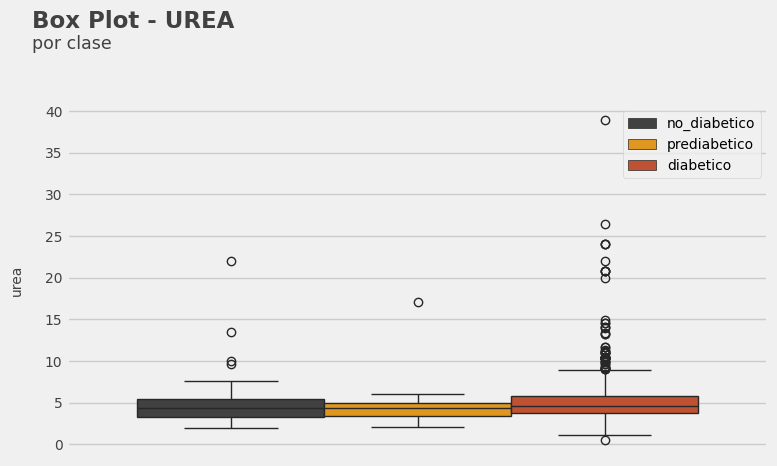

In [ ]:
columna = 'urea'
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, y=columna,  hue='class', palette=palette)

plt.ylabel(f'{columna}', fontsize = 10, color = '#414141',labelpad = 15)

plt.yticks( fontsize = 10, color = '#414141');
plt.xticks( fontsize = 10, color = '#414141');
# plt.axhline(y = 0, color = '#414141', linewidth = 5, alpha = 0.5)


plt.text(x=-0.55, y=50, s = f"Box Plot - {columna.upper()}", fontsize = 16.5, fontweight = 'bold', color = '#414141');
plt.text(x=-0.55, y=47.5, s = 'por clase', fontsize = 12.5, color = '#414141');
plt.legend(loc = 'upper right',fancybox = True, fontsize = 10,)

plt.tight_layout()
plt.show()
# Crea un diagrama de caja (box plot) para visualizar y comparar la distribución de una variable numérica ('urea') a través de las categorías de 'class'.

#### Interpretación:
El gráfico muestra que los niveles de urea son más altos en diabéticos, seguidos por prediabéticos y más bajos en no diabéticos, con mayor dispersión y valores extremos en el grupo diabético.

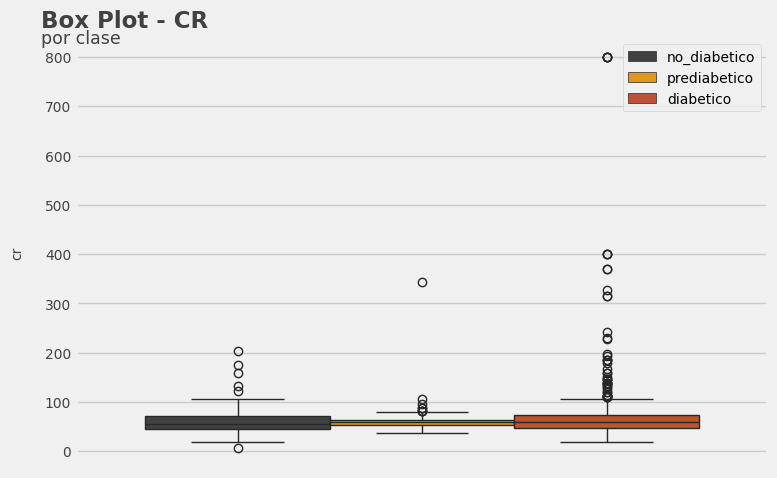

In [ ]:
columna = 'cr'
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, y=columna,  hue='class', palette=palette)

plt.ylabel(f'{columna}', fontsize = 10, color = '#414141',labelpad = 15)

plt.yticks( fontsize = 10, color = '#414141');
plt.xticks( fontsize = 10, color = '#414141');
# plt.axhline(y = 0, color = '#414141', linewidth = 5, alpha = 0.5)


plt.text(x=-0.55, y=860, s = f"Box Plot - {columna.upper()}", fontsize = 16.5, fontweight = 'bold', color = '#414141');
plt.text(x=-0.55, y=827.5, s = 'por clase', fontsize = 12.5, color = '#414141');
plt.legend(loc = 'upper right',fancybox = True, fontsize = 10,)

plt.tight_layout()
plt.show()

# Crea un diagrama de caja (box plot) para visualizar y comparar la distribución de una variable numérica ('cr') a través de las categorías de 'class'.

#### Interpretación:
El gráfico muestra que los niveles de creatina (CR) son más altos en diabéticos, seguidos por prediabéticos y más bajos en no diabéticos, con mayor dispersión y valores extremos en el grupo diabético.

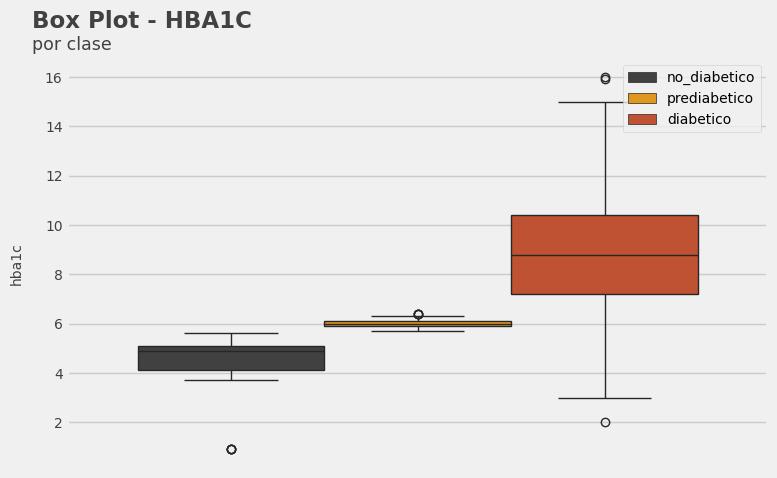

In [ ]:
columna = 'hba1c'
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, y=columna,  hue='class', palette=palette)

plt.ylabel(f'{columna}', fontsize = 10, color = '#414141',labelpad = 15)

plt.yticks( fontsize = 10, color = '#414141');
plt.xticks( fontsize = 10, color = '#414141');
# plt.axhline(y = 0, color = '#414141', linewidth = 5, alpha = 0.5)


plt.text(x=-0.55, y=18, s = f"Box Plot - {columna.upper()}", fontsize = 16.5, fontweight = 'bold', color = '#414141');
plt.text(x=-0.55, y=17.1, s = 'por clase', fontsize = 12.5, color = '#414141');
plt.legend(loc = 'upper right',fancybox = True, fontsize = 10,)

plt.tight_layout()
plt.show()
# Crea un diagrama de caja (box plot) para visualizar y comparar la distribución de una variable numérica ('hba1c') a través de las categorías de 'class'.

#### Interpretación:
El gráfico muestra que los niveles de hemoglobina glucosilada (HbA1c) son más altos en diabéticos, seguidos por prediabéticos y más bajos en no diabéticos, con mayor dispersión y valores extremos en el grupo diabético.

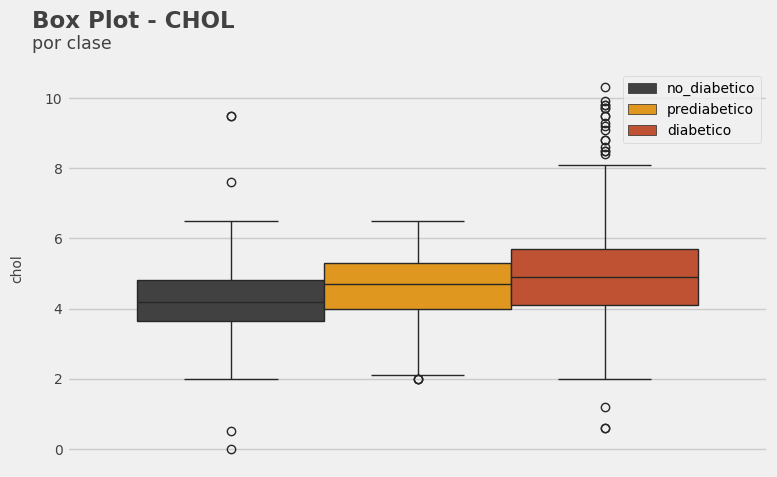

In [ ]:
columna = 'chol'
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, y=columna,  hue='class', palette=palette)

plt.ylabel(f'{columna}', fontsize = 10, color = '#414141',labelpad = 15)

plt.yticks( fontsize = 10, color = '#414141');
plt.xticks( fontsize = 10, color = '#414141');
# plt.axhline(y = 0, color = '#414141', linewidth = 5, alpha = 0.5)


plt.text(x=-0.55, y=12, s = f"Box Plot - {columna.upper()}", fontsize = 16.5, fontweight = 'bold', color = '#414141');
plt.text(x=-0.55, y=11.4, s = 'por clase', fontsize = 12.5, color = '#414141');
plt.legend(loc = 'upper right',fancybox = True, fontsize = 10,)

plt.tight_layout()
plt.show()

# Crea un diagrama de caja (box plot) para visualizar y comparar la distribución de una variable numérica ('chol') a través de las categorías de 'class'.


#### Interpretación:
El gráfico muestra que los niveles de colesterol (CHOL) son más altos en diabéticos, seguidos por prediabéticos y más bajos en no diabéticos, con mayor dispersión y valores extremos en el grupo no diabético.

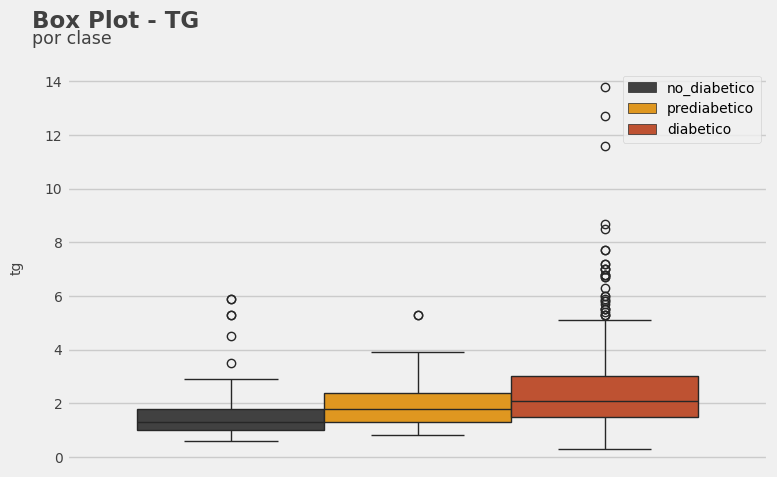

In [ ]:
columna = 'tg'
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, y=columna,  hue='class', palette=palette)

plt.ylabel(f'{columna}', fontsize = 10, color = '#414141',labelpad = 15)

plt.yticks( fontsize = 10, color = '#414141');
plt.xticks( fontsize = 10, color = '#414141');
# plt.axhline(y = 0, color = '#414141', linewidth = 5, alpha = 0.5)


plt.text(x=-0.55, y=16, s = f"Box Plot - {columna.upper()}", fontsize = 16.5, fontweight = 'bold', color = '#414141');
plt.text(x=-0.55, y=15.4, s = 'por clase', fontsize = 12.5, color = '#414141');
plt.legend(loc = 'upper right',fancybox = True, fontsize = 10,)

plt.tight_layout()
plt.show()

# Crea un diagrama de caja (box plot) para visualizar y comparar la distribución de una variable numérica ('tg') a través de las categorías de 'class'.

#### Interpretación:
El gráfico muestra que los niveles de triglicéridos (TG) son más altos en diabéticos, seguidos por prediabéticos y más bajos en no diabéticos, con mayor dispersión y valores extremos en el grupo diabético.

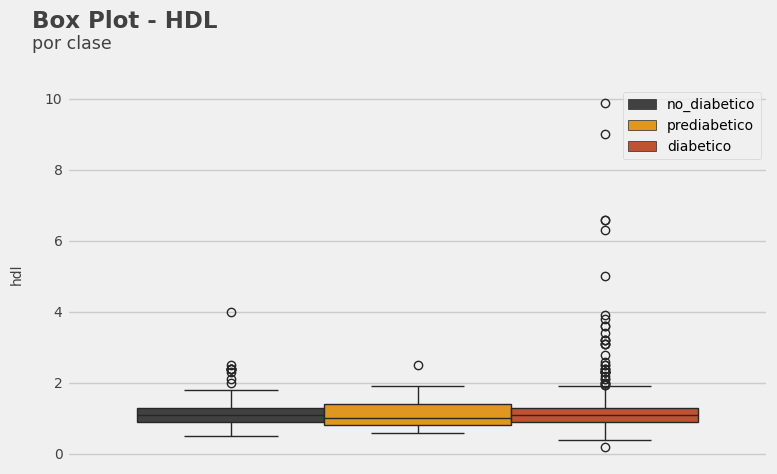

In [ ]:
columna = 'hdl'
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, y=columna,  hue='class', palette=palette)

plt.ylabel(f'{columna}', fontsize = 10, color = '#414141',labelpad = 15)

plt.yticks( fontsize = 10, color = '#414141');
plt.xticks( fontsize = 10, color = '#414141');
# plt.axhline(y = 0, color = '#414141', linewidth = 5, alpha = 0.5)


plt.text(x=-0.55, y=12, s = f"Box Plot - {columna.upper()}", fontsize = 16.5, fontweight = 'bold', color = '#414141');
plt.text(x=-0.55, y=11.4, s = 'por clase', fontsize = 12.5, color = '#414141');
plt.legend(loc = 'upper right',fancybox = True, fontsize = 10,)

plt.tight_layout()
plt.show()
# Crea un diagrama de caja (box plot) para visualizar y comparar la distribución de una variable numérica ('hdl') a través de las categorías de 'class'.


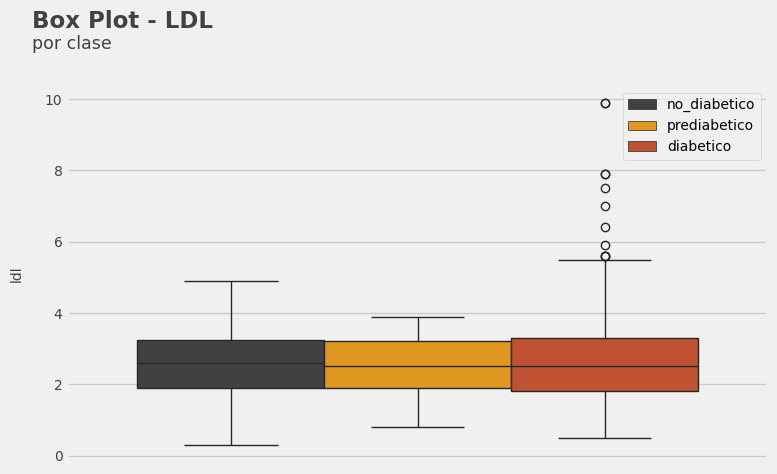

In [ ]:
columna = 'ldl'
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, y=columna,  hue='class', palette=palette)

plt.ylabel(f'{columna}', fontsize = 10, color = '#414141',labelpad = 15)

plt.yticks( fontsize = 10, color = '#414141');
plt.xticks( fontsize = 10, color = '#414141');
# plt.axhline(y = 0, color = '#414141', linewidth = 5, alpha = 0.5)


plt.text(x=-0.55, y=12, s = f"Box Plot - {columna.upper()}", fontsize = 16.5, fontweight = 'bold', color = '#414141');
plt.text(x=-0.55, y=11.4, s = 'por clase', fontsize = 12.5, color = '#414141');
plt.legend(loc = 'upper right',fancybox = True, fontsize = 10,)

plt.tight_layout()
plt.show()
# Crea un diagrama de caja (box plot) para visualizar y comparar la distribución de una variable numérica ('ldl') a través de las categorías de 'class'.

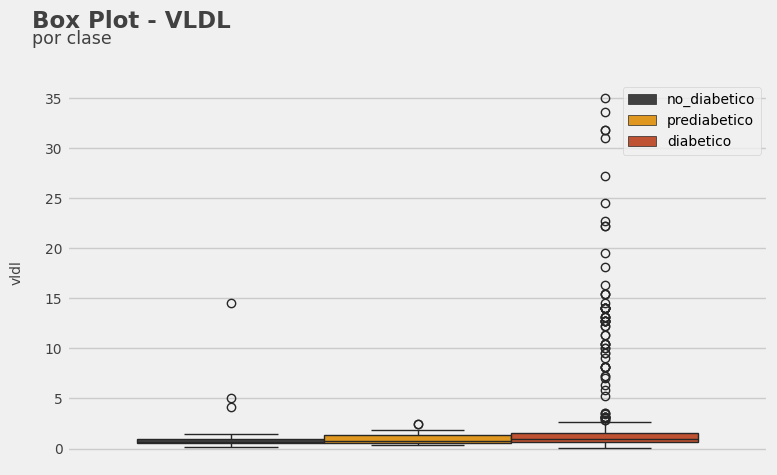

In [ ]:
columna = 'vldl'
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, y=columna,  hue='class', palette=palette)

plt.ylabel(f'{columna}', fontsize = 10, color = '#414141',labelpad = 15)

plt.yticks( fontsize = 10, color = '#414141');
plt.xticks( fontsize = 10, color = '#414141');
# plt.axhline(y = 0, color = '#414141', linewidth = 5, alpha = 0.5)


plt.text(x=-0.55, y=42, s = f"Box Plot - {columna.upper()}", fontsize = 16.5, fontweight = 'bold', color = '#414141');
plt.text(x=-0.55, y=40.4, s = 'por clase', fontsize = 12.5, color = '#414141');
plt.legend(loc = 'upper right',fancybox = True, fontsize = 10,)

plt.tight_layout()
plt.show()
# Crea un diagrama de caja (box plot) para visualizar y comparar la distribución de una variable numérica ('vldl') a través de las categorías de 'class'.

#### Interpretación
Los box plots de HDL, LDL y VLDL por clase de diabetes no son muy concluyentes para establecer diferencias claras entre los grupos no diabético, prediabético y diabético, ya que las medianas y rangos intercuartiles son similares. Sin embargo, se observa que los diabéticos presentan una mayor cantidad de valores atípicos, indicando una mayor variabilidad y dispersión en sus niveles de colesterol en comparación con los otros grupos.

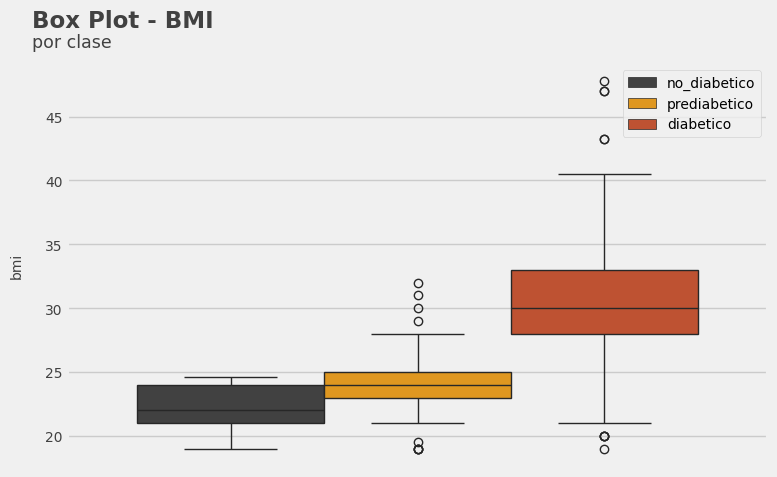

In [ ]:
columna = 'bmi'
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, y=columna,  hue='class', palette=palette)

plt.ylabel(f'{columna}', fontsize = 10, color = '#414141',labelpad = 15)

plt.yticks( fontsize = 10, color = '#414141');
plt.xticks( fontsize = 10, color = '#414141');
# plt.axhline(y = 0, color = '#414141', linewidth = 5, alpha = 0.5)


plt.text(x=-0.55, y=52, s = f"Box Plot - {columna.upper()}", fontsize = 16.5, fontweight = 'bold', color = '#414141');
plt.text(x=-0.55, y=50.4, s = 'por clase', fontsize = 12.5, color = '#414141');
plt.legend(loc = 'upper right',fancybox = True, fontsize = 10,)

plt.tight_layout()
plt.show()
# Crea un diagrama de caja (box plot) para visualizar y comparar la distribución de una variable numérica ('bmi') a través de las categorías de 'class'.

#### Interpretación:
El gráfico muestra que el índice de masa corporal (BMI) es más alto en diabéticos, seguido por prediabéticos y más bajo en no diabéticos, con mayor dispersión y valores extremos en el grupo diabético.

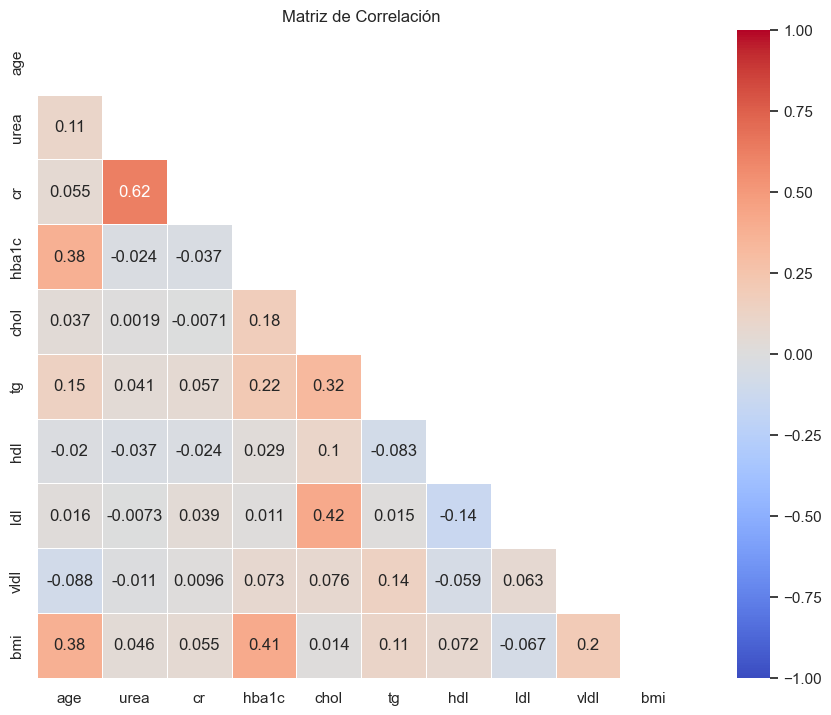

In [114]:
# Calcular la matriz de correlación
corr_matrix = df[['age', 'urea', 'cr', 'hba1c', 'chol', 'tg','hdl', 'ldl', 'vldl', 'bmi',]].corr()

# Crear una máscara para ocultar la mitad superior de la matriz (opcional, para mejor visualización)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Configurar el estilo de Seaborn
sns.set_theme(style="white")

# Crear el mapa de calor (heatmap) de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap="coolwarm", vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Mostrar el gráfico
plt.title("Matriz de Correlación")
plt.show()

#### Interpretación:
Se observan correlaciones débiles a moderadas:
- edad y bmi (0.38).
- colesterol y ldl (0.41).
- colesterol y tg (0.32).
- Bmi y hba1c (0.41)
- edad y hba1c (0.38)